In [2]:
import numpy as np
from scipy.stats import norm
import math

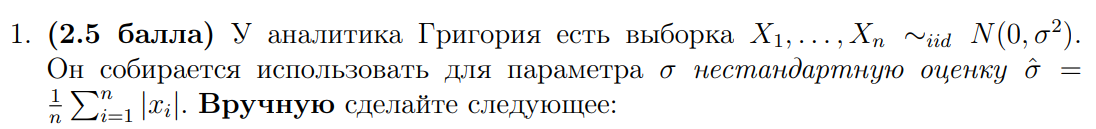

(a) Найдите плотность распределения для случайной величины |X|.

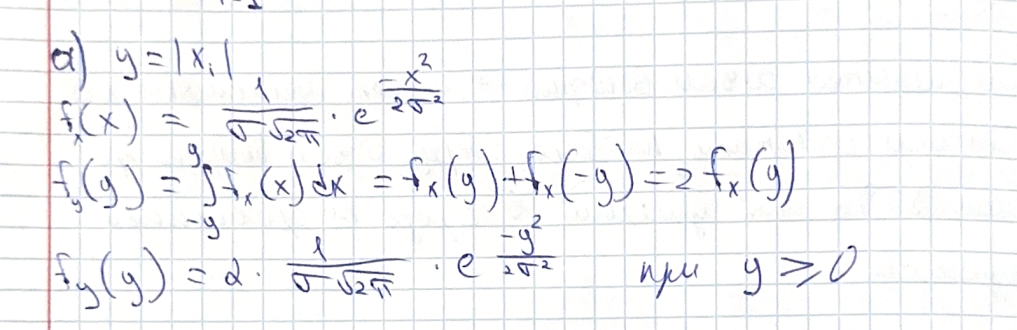

(b) Проверьте, является ли оценка σˆ смещенной, найдите ее смещение, если оценка смещена, то скорректируйте ее.

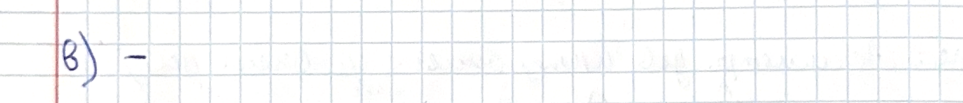

(c) Найдите дисперсию скорректированной оценки.

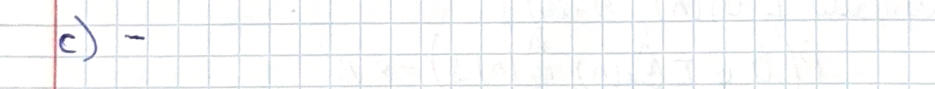

(d) Проверьте, является ли оценка состоятельной.

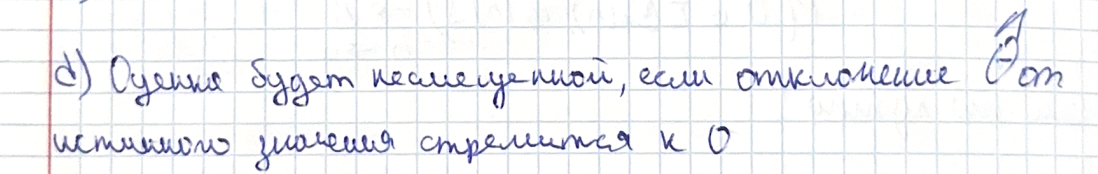

(e) Найдите для скорректированной оценки MSE.

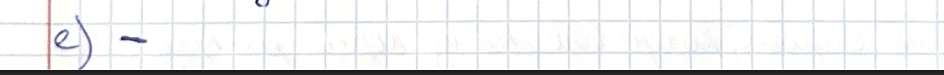

<b>2. (2.5 балла) Аналитика Григория пригласили преподавать студентам магистратуры теорию вероятностей и статистику. Чтобы провести интересный курс, он подготовил 400 задач по терверу и 100 задач по матстату. Среди задач по терверу 250 задач оказались удачными, среди задач по матстату удачными оказались 60 задач<b>

(a) Методом моментов найдите точечную оценку для доли удачных задач среди задач по матстату (вручную).

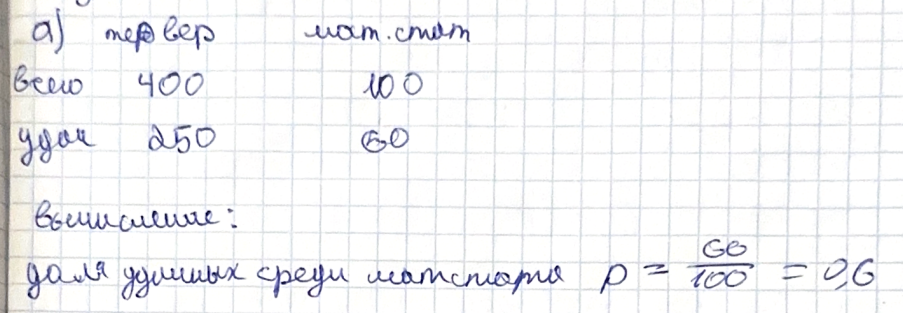

P = 60 / 100 = 0.6

(b) Постройте 95% асимптотический доверительный интервал для доли удачных задач по матстату. Какая у него получалась длина?

In [55]:
n_matstat = 100
a_matstat =  60
b = 0.95
a = 1 - b

p_good_matstat = a_matstat / n_matstat

standard = norm(0, 1)
z = standard.ppf(1 - (a/2))

e = ((p_good_matstat*(1-p_good_matstat))/n_matstat)**0.5

left = p_good_matstat - z * e
right = p_good_matstat + z * e

print(f"Доверительный интервал от {round(left, 3)} до {round(right, 3)}")

Доверительный интервал от 0.504 до 0.696


(c) Постройте 95% асимптотический доверительный интервал для доли удачных задач по терверу. Какая у него получалась длина?

In [3]:
n_terver = 400
a_terver =  250
b = 0.95
a = 1 - b

p_good_terver = a_terver / n_terver

standard = norm(0, 1)
z = standard.ppf(1 - (a/2))

e = ((p_good_terver*(1-p_good_terver))/n_terver)**0.5

left = p_good_terver - z * e
right = p_good_terver + z * e

print(f"Длина {round(right - left, 3)}")

print(f"Доверительный интервал от {round(left, 3)} до {round(right, 3)}")

Длина 0.095
Доверительный интервал от 0.578 до 0.672


(d) Постройте 95% асимптотический доверительный интервал для разницы
долей удачных хадач по терверу и матстату. Какой длины он оказался?
Попадет ли ноль в этот интервал? Что это означает?

In [98]:
n_matstat = 100
a_matstat =  60
b = 0.95
a = 1 - b
p_good_matstat = a_matstat / n_matstat

n_terver = 400
a_terver =  250
p_good_terver = a_terver / n_terver

standard = norm(0, 1)
z = standard.ppf(1 - (a/2))

p_diff = p_good_terver - p_good_matstat
e = ((p_good_matstat*(1-p_good_matstat))/n_matstat + (p_good_terver*(1-p_good_terver))/n_terver)**0.5

left = p_diff - z * e
right = p_diff + z * e

print(f"Доверительный интервал от {round(left, 3)} до {round(right, 3)}")
print(f"Длина {round(right - left, 3)}")
print(f"Ноль включает => разница незначима")

Доверительный интервал от -0.082 до 0.132
Длина 0.214
Ноль включает => разница незначима


(e) Нужно ли предположение о нормальности для решения предыдущих пунктов? А какие предположения нужны? Выпишите их.

- Предположение о нормальности - НЕ НУЖНО




- Равновероятность успешной и неуспешной задачи
- Достаточный объем данных

<b>3. (1 балл) Аналитик Григорий пытается выяснить, какая доля жителей Москвы любит кофе. Он хочет построить оценку так, чтобы ширина 99% доверительного интервала для нее оказалась не больше 0.1 </b>

(a) Предположим, что Григорий ничего не знает о доле. Сколько наблюдений
Григорию необходимо собрать для достижения такой точности?

In [125]:
b = 0.99
a = 1 - b

standard = norm(0, 1)
z = standard.ppf(1 - (a/2))

# возьмем p = 0.5
p = 0.5
# 0.1 = 2 * z * math.sqrt((p*(1-p))/n)
# 0.1 = 2 * z * math.sqrt((p*(1-p))/n)
# n - ?

# math.sqrt((p*(1-p))/n) = 0.1 / 2*z
# (p*(1-p)) / n  = (0.1 / 2*z)**2
# n  = ((0.1 / 2*z)**2) / (p*(1-p))

print(f"Нужно собрать {math.ceil((p*(1-p)) / ((0.1 / (2*z))**2))} наблюдений")

Нужно собрать 664 наблюдений


(b) Аналитик Соня проговорилась Григорию, что в прошлом году уже опрашивала так людей. У нее оценка доли получалась в районе 0.7. Григорий всецело доверяет Соне. Сколько наблюдений ему надо провести для достижения той же точности с учетом этой информации?


In [126]:
b = 0.99
a = 1 - b

standard = norm(0, 1)
z = standard.ppf(1 - (a/2))

# возьмем p = 0.5
p = 0.7
# 0.1 = 2 * z * math.sqrt((p*(1-p))/n)
# 0.1 = 2 * z * math.sqrt(0.25/n)
# n - ?

# math.sqrt((p*(1-p))/n) = 0.1 / 2*z
# (p*(1-p)) / n  = (0.1 / 2*z)**2
# n  = ((0.1 / 2*z)**2) / (p*(1-p))

print(f"Нужно собрать {math.ceil((p*(1-p)) / ((0.1 / (2*z))**2))} наблюдений")

Нужно собрать 558 наблюдений


<b>(4 балла)Устроившись на новую работу, аналитик данных Григорий решил
оценить интенсивность потока стандартных рабочих задач. Он считает, что количество стандартных задач, которые падают на него за t рабочих дней, распределено как Pois(θ · t), где θ - некоторый параметр. Учитывая имеющийся опыт
прошлой работы он решил взять Γ(20, 10) в качестве априорного распределения
для θ.</b>

(a) По итогам первой рабочей недели на него свалилось 7 стандартных рабочих задач за 5 рабочих дней. Помогите ему построить апостериорное
распределение для θ. Подсказка: константу в формуле для плотности апостериорного распределения не обязательно находить явно.


In [67]:
alpha = 20
beta = 10

tasks = 7
days = 5

p_alpha = alpha + tasks
p_beta = beta + days

print(f"p_alpha = {p_alpha}, p_beta = {p_beta}")

p_alpha = 27, p_beta = 15


(b) В качестве функции риска Григорий предпочитает использовать MSE.
Помогите ему построить точечную оценку для θ на основе апостериорного
распределения. В этом пункте можно использовать стандартные знания
про Гамма-распределение без доказательства.

In [80]:
th = (p_alpha) / (p_beta)

print(f"Точечная оценка θ: {th}")

(b) Точечная оценка θ: 1.8


(c) С помощью scipy.stats и апостериорного рапсределения постройте интервал, в котором θ будет лежать с вероятностью 95%.


In [81]:
from scipy.stats import gamma as g

In [82]:
left = g.ppf(0.025, a=p_alpha, scale=1/p_beta)
right = g.ppf(0.975, a=p_alpha, scale=1/p_beta)

print(f"Интервал от {round(left, 3)} до {round(right, 3)}")

Интервал от 1.186 до 2.54


(d) Предположим, что на самом деле θ = 1.9. Проведите симуляции и ответьте
на вопрос, как быстро в среднем будет убывать длина интервала из прошлого пункта в зависимости от n – количества отработанных Григорием
недель.


In [78]:
import matplotlib.pyplot as plt

In [96]:
th = 1.9
weeks = np.arange(1, 101)
lengths = []

for w in weeks:
    days = 5 * w
    
    tasks = np.random.poisson(th * 5)
    
    p_alpha = alpha + tasks
    p_beta = beta + days
    
    left = g.ppf(0.025, a=p_alpha, scale=1/p_beta)
    right = g.ppf(0.975, a=p_alpha, scale=1/p_beta)
    
    lengths.append(right-left)

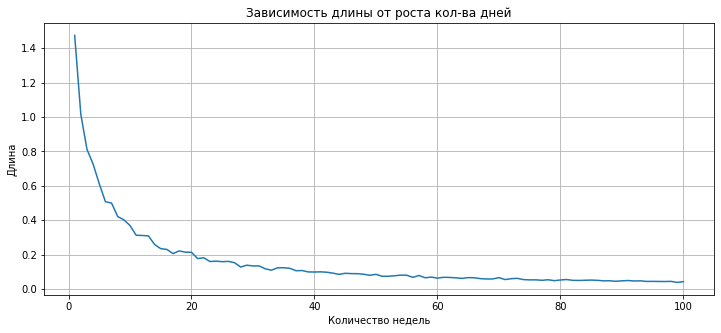

In [97]:
plt.figure(figsize=(12, 5))
plt.plot(weeks, lengths)
plt.xlabel("Количество недель")
plt.ylabel("Длина")
plt.title("Зависимость длины от роста кол-ва дней")
plt.grid(True)
plt.show()